# **Ejemplo 1**
Aplicar la función de ruido Gaussiano a la imagen lena.png


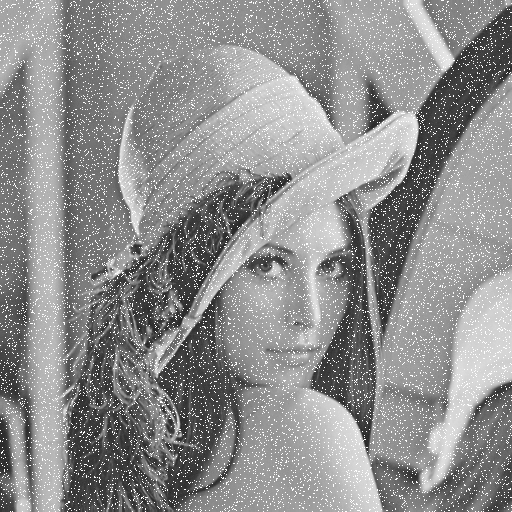

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("Lenna.png", 0)


#k_bits = 1 #@param {type:"slider", min:1, max:8, step:1}
sigma = 0.7 #@param {type:"slider", min:0, max:1, step:0.01}

n = np.random.normal(0, sigma, img.size)
n = n.reshape(img.shape).astype('uint8')
res = cv2.add(img, n)
cv2_imshow(res)

# **Ejemplo 2**
Basado en el ejemplo anterior, aplica la degradación de ruido Gaussiano a una
imagen a color peppers.png con la función de numpy np.random.normal()


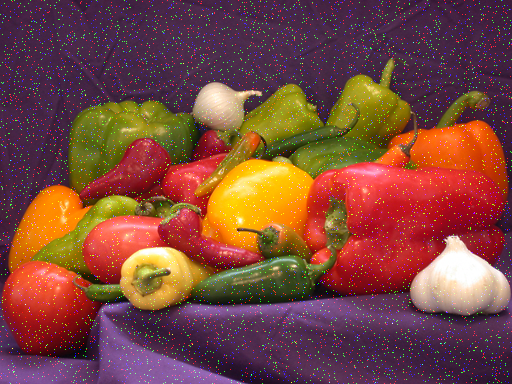

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
sigma = 0.91 #@param {type:"slider", min:0, max:1, step:0.01}
mean = 0.91 #@param {type:"slider", min:0, max:1, step:0.01}
img = cv2.imread('peppers.png')

# Generate Gaussian noise
gauss = np.random.normal(mean,sigma,img.size)
gauss = gauss.reshape(img.shape).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)

# **Ejemplo 3**
Realiza el proceso de degradación de una imagen determinada por h(x,y) como una función Gaussiana en 2D

Blur convolved


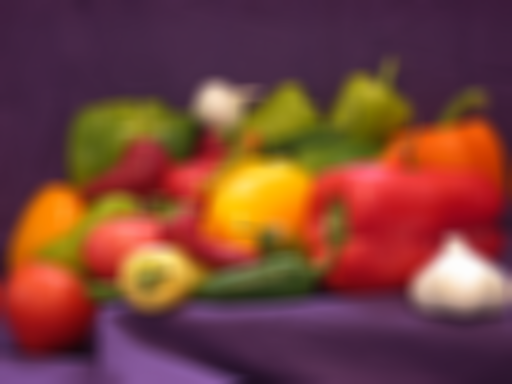

Blur image with gaussian noise


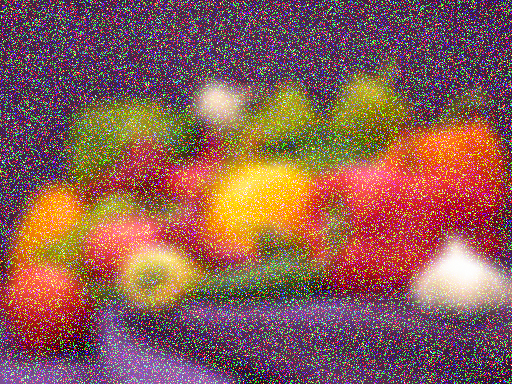

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow


sigma = 0.91 #@param {type:"slider", min:0, max:1, step:0.01}
mean = 0 #@param {type:"slider", min:0, max:1, step:0.01}
blur = 3 #@param {type:"slider", min:1, max:21, step:2}  
h = np.ones((blur,blur))/blur**2

img = np.float32(cv2.imread('peppers.png'))

conv_img = cv2.filter2D(img,-1,h)
conv_img = conv_img.astype('uint8')
#conv2_img = signal.convolve2d(img, h)

print("Blur convolved")
cv2_imshow(conv_img) 

#After convolved image
# Generate Gaussian noise
gauss = np.random.normal(mean,sigma,conv_img.size)
gauss = gauss.reshape(conv_img.shape).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(conv_img,gauss)
# Display the image
print("Blur image with gaussian noise")
cv2_imshow(img_gauss)



# **Ejemplo 4**
Realiza un programa en python que realice el
filtro de media aritmética a una imagen
degradada g(x,y) para que permita recuperar la
imagen original

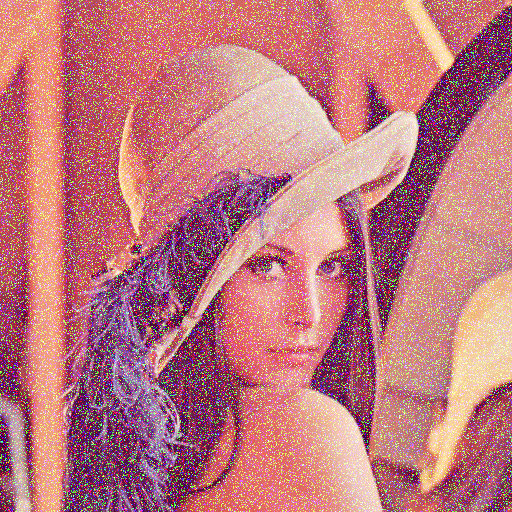

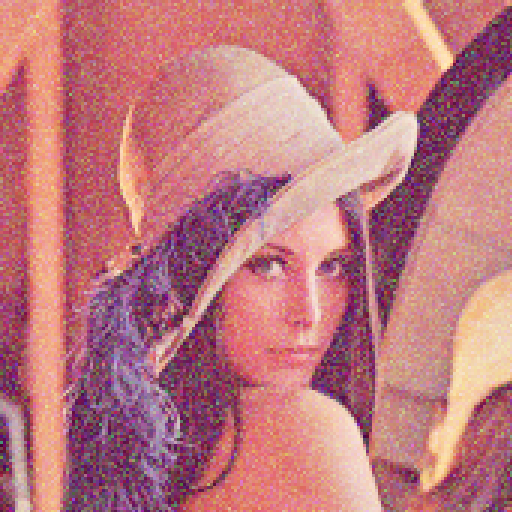

In [ ]:
#### Codigo relativamente funcional de la act 2
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from math import ceil

# Set parameters
color = True #@param {type:"boolean"}
Image = "Lenna"
Resolution = 3 #@param {type:"slider", min:1, max:55, step:2}
N = Resolution

# See if the Max function is selecte

# Declare our function to calculate resolution
func = lambda x: np.mean(x)
# Read image
img = cv2.imread(Image + ".png", color)


#### Gaussian noise
sigma = 1 #@param {type:"slider", min:0, max:1, step:0.01}
mean = 0.08 #@param {type:"slider", min:0, max:1, step:0.01}

# Generate Gaussian noise
gauss = np.random.normal(mean,sigma,img.size)
gauss = gauss.reshape(img.shape).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)

img = img_gauss

# Get the shape of the img
height = img.shape[0]
width = img.shape[1]

# Get the offset
offset = int((N-1)/2)

# If it's colored, it's going to happen on the three channels
if color:
  for k in range(3): # for each channel
    for j in range(ceil(height/N)): # travel the Y axis
      cy = int(offset + j*N)     #Center y of kernel
      for i in range(ceil(width/N)): # travel the X axis
        cx = int(offset + i*N)    #Center x of kernel
        kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] # calculate the kernel using offsets
        mv = func(kernel)  # Apply the function to the kernel
        img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] = mv #override the img section with the modified kernel
else:
  for j in range(ceil(height/N)): # Y axis
    cy = int(offset + j*N)     #  Center y of kernel
    for i in range(ceil(width/N)): # X axis
      cx = int(offset + i*N)    # Center x of kernel
      kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1]
      mv = func(kernel)  # Apply the function
      img[cy - offset: cy + offset+1, cx - offset: cx + offset+1] = mv

cv2_imshow(img)

# **Ejemplo 5**
Realiza un programa en python que compare los
resultados del filtro de media aritmética con un
filtro de media geométrica a la imagen degradada
para recuperar la imagen original



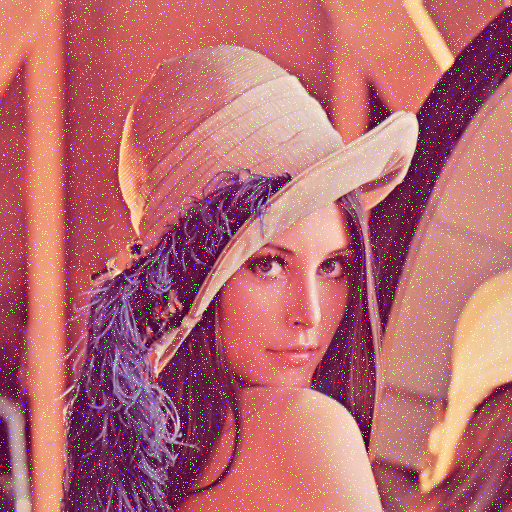

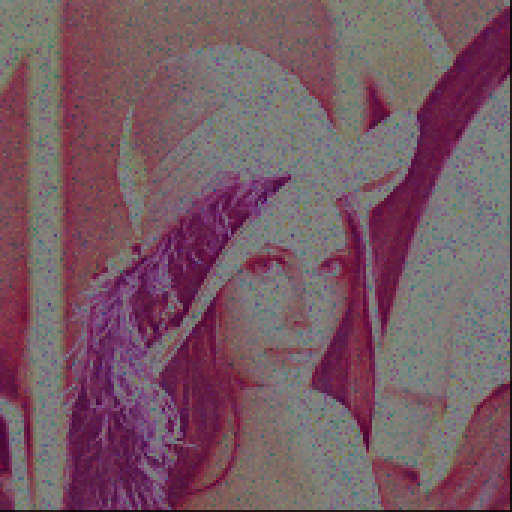

In [ ]:
#### Codigo relativamente funcional de la act 2
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from math import ceil

# Set parameters
color = True #@param {type:"boolean"}
Image = "Lenna"
Resolution = 3 #@param {type:"slider", min:1, max:55, step:2}
N = Resolution

# See if the Max function is selecte


# Declare our function to calculate resolution
func = lambda x: (np.prod(x))**(1/(N*N))
# Read image
img = cv2.imread(Image + ".png", color)


#### Gaussian noise
sigma = 1 #@param {type:"slider", min:0, max:1, step:0.01}
mean = 0.79 #@param {type:"slider", min:0, max:1, step:0.01}

# Generate Gaussian noise
gauss = np.random.normal(mean,sigma,img.size)
gauss = gauss.reshape(img.shape).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)

img = img_gauss

# Get the shape of the img
height = img.shape[0]
width = img.shape[1]

# Get the offset
offset = int((N-1)/2)

# If it's colored, it's going to happen on the three channels
if color:
  for k in range(3): # for each channel
    for j in range(ceil(height/N)): # travel the Y axis
      cy = int(offset + j*N)     #Center y of kernel
      for i in range(ceil(width/N)): # travel the X axis
        cx = int(offset + i*N)    #Center x of kernel
        kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] # calculate the kernel using offsets
        mv = func(kernel)  # Apply the function to the kernel
        img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] = mv #override the img section with the modified kernel
else:
  for j in range(ceil(height/N)): # Y axis
    cy = int(offset + j*N)     #  Center y of kernel
    for i in range(ceil(width/N)): # X axis
      cx = int(offset + i*N)    # Center x of kernel
      kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1]
      mv = func(kernel)  # Apply the function
      img[cy - offset: cy + offset+1, cx - offset: cx + offset+1] = mv

cv2_imshow(img)

# **Ejemplo 6**
Reemplaza las operaciones de media por una función de mediana para que
aplique la restauración a la imagen degradada g(x,y)


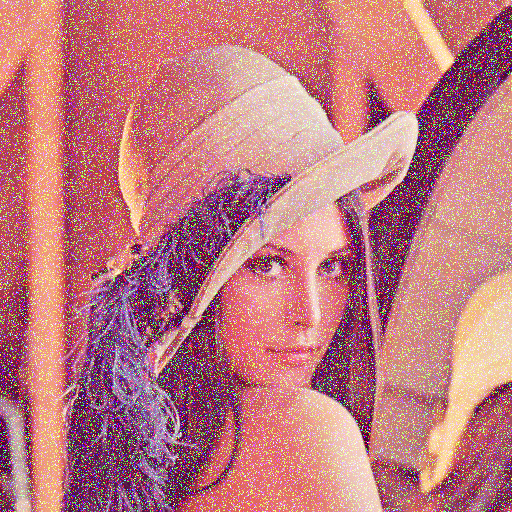

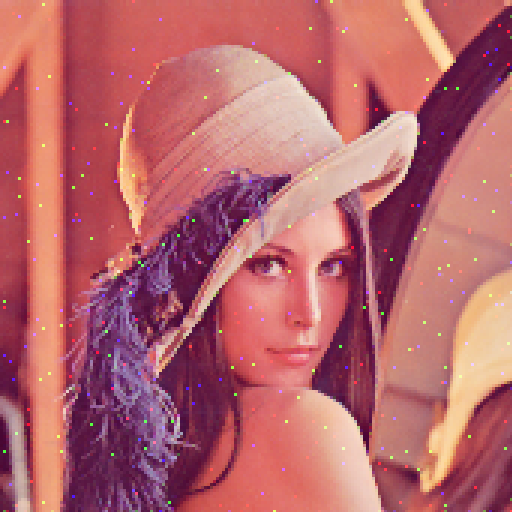

In [ ]:
#### Codigo relativamente funcional de la act 2
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from math import ceil

# Set parameters
color = True #@param {type:"boolean"}
Image = "Lenna"
Resolution = 3 #@param {type:"slider", min:1, max:55, step:2}
N = Resolution

# See if the Max function is selecte

# Declare our function to calculate resolution
func = lambda x: np.median(x)
# Read image
img = cv2.imread(Image + ".png", color)


#### Gaussian noise
sigma = 1 #@param {type:"slider", min:0, max:1, step:0.01}
mean = 0.08 #@param {type:"slider", min:0, max:1, step:0.01}

# Generate Gaussian noise
gauss = np.random.normal(mean,sigma,img.size)
gauss = gauss.reshape(img.shape).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)

img = img_gauss

# Get the shape of the img
height = img.shape[0]
width = img.shape[1]

# Get the offset
offset = int((N-1)/2)

# If it's colored, it's going to happen on the three channels
if color:
  for k in range(3): # for each channel
    for j in range(ceil(height/N)): # travel the Y axis
      cy = int(offset + j*N)     #Center y of kernel
      for i in range(ceil(width/N)): # travel the X axis
        cx = int(offset + i*N)    #Center x of kernel
        kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] # calculate the kernel using offsets
        mv = func(kernel)  # Apply the function to the kernel
        img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] = mv #override the img section with the modified kernel
else:
  for j in range(ceil(height/N)): # Y axis
    cy = int(offset + j*N)     #  Center y of kernel
    for i in range(ceil(width/N)): # X axis
      cx = int(offset + i*N)    # Center x of kernel
      kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1]
      mv = func(kernel)  # Apply the function
      img[cy - offset: cy + offset+1, cx - offset: cx + offset+1] = mv

cv2_imshow(img)

# **Ejemplo 7**
Reemplaza las operaciones de media por una función de máximo y mínimo para que
aplique la restauración a la imagen degradada mediante las siguientes funciones


False


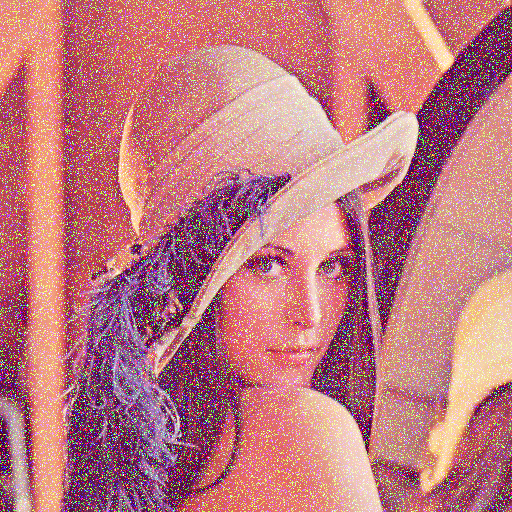

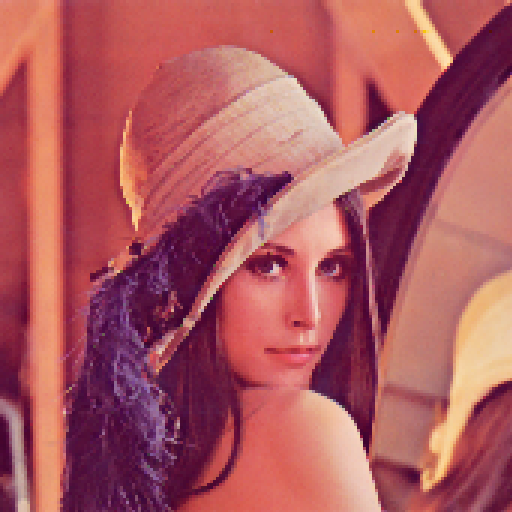

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from math import ceil

# Set parameters
color = True #@param {type:"boolean"}
Image = "Lenna"
Function = "(b) Min function" #@param ["(a) Max function", "(b) Min function"]
Resolution = 3 #@param {type:"slider", min:1, max:55, step:2}
N = Resolution

# See if the Max function is selecte
f_flag = True if Function[1] == "a" else False   #Function flag
print(f_flag)
# Declare our function to calculate resolution
func = lambda x: max(x) if f_flag else min(x)

# Read image
img = cv2.imread(Image + ".png", color)


#### Gaussian noise
sigma = 1 #@param {type:"slider", min:0, max:1, step:0.01}
mean = 0.08 #@param {type:"slider", min:0, max:1, step:0.01}

# Generate Gaussian noise
gauss = np.random.normal(mean,sigma,img.size)
gauss = gauss.reshape(img.shape).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)

img = img_gauss

# Get the shape of the img
height = img.shape[0]
width = img.shape[1]

# Get the offset
offset = int((N-1)/2)

# If it's colored, it's going to happen on the three channels
if color:
  for k in range(3): # for each channel
    for j in range(ceil(height/N)): # travel the Y axis
      cy = int(offset + j*N)     #Center y of kernel
      for i in range(ceil(width/N)): # travel the X axis
        cx = int(offset + i*N)    #Center x of kernel
        kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] # calculate the kernel using offsets
        mv = func(map(func, kernel))  # Apply the function to the kernel
        img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] = mv #override the img section with the modified kernel
else:
  for j in range(ceil(height/N)): # Y axis
    cy = int(offset + j*N)     #  Center y of kernel
    for i in range(ceil(width/N)): # X axis
      cx = int(offset + i*N)    # Center x of kernel
      kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1]
      mv = func(map(func, kernel))  # Apply the function
      img[cy - offset: cy + offset+1, cx - offset: cx + offset+1] = mv

cv2_imshow(img)

## **Ejemplos 4-7**

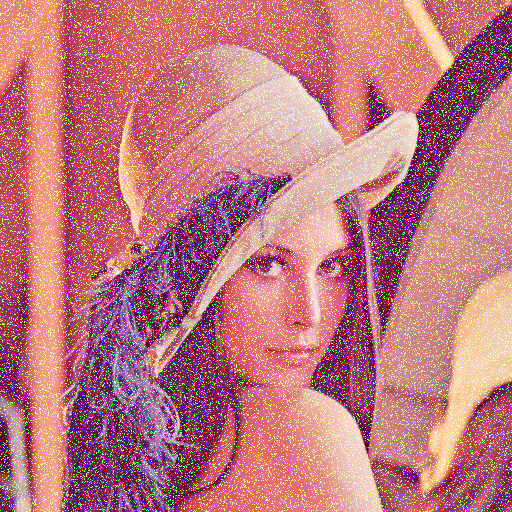

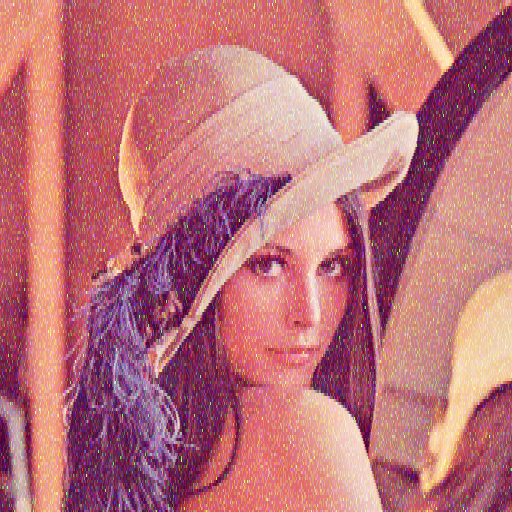

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from math import ceil
from scipy.stats import gmean

# Set parameters
color = True #@param {type:"boolean"}
Image = "Lenna"
Function = "(b) Geometric mean" #@param ["(a) Arithmetic mean", "(b) Geometric mean", "(c) Median", "(d) Min function", "(e) Max function"]
Resolution = 3 #@param {type:"slider", min:1, max:55, step:2}
N = Resolution

# See if the Max function is selecte

def geometric_mean(array):
  return (np.prod(array))**(1/(N*N))

functions_dict = {
    "a": np.mean,
    "b": gmean,
    "c": np.median,
    "d": np.min,
    "e": np.max,
}


# Declare our function to calculate resolution
function_letter = Function[1]
func = lambda x: functions_dict[function_letter](x)

# Read image
img = cv2.imread(Image + ".png", color)
# img = cv2.imread("lake-watermark.jpg")



#### Gaussian noise
sigma = 1 #@param {type:"slider", min:0, max:1, step:0.01}
mean = 0.08 #@param {type:"slider", min:0, max:1, step:0.01}

# Generate Gaussian noise
gauss = np.random.normal(mean,sigma,img.size)
gauss = gauss.reshape(img.shape).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)

img = img_gauss

# Get the shape of the img
height = img.shape[0]
width = img.shape[1]

# Get the offset
offset = int((N-1)/2)

# If it's colored, it's going to happen on the three channels
if color:
  for k in range(3): # for each channel
    for j in range(ceil(height/N)): # travel the Y axis
      cy = int(offset + j*N)     #Center y of kernel
      for i in range(ceil(width/N)): # travel the X axis
        cx = int(offset + i*N)    #Center x of kernel
        kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] # calculate the kernel using offsets
        mv = func(kernel)  # Apply the function to the kernel
        img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] = mv #override the img section with the modified kernel
else:
  for j in range(ceil(height/N)): # Y axis
    cy = int(offset + j*N)     #  Center y of kernel
    for i in range(ceil(width/N)): # X axis
      cx = int(offset + i*N)    # Center x of kernel
      kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1]
      mv = func(kernel)  # Apply the function
      img[cy - offset: cy + offset+1, cx - offset: cx + offset+1] = mv

cv2_imshow(img)

# **Ejemplo 8 y 9**
Escribe un programa en python que permita aplicar
la degradación de movimiento a la imagen lena.png
en escala de grises

Del programa anterior, ajusta la matriz del filtro h(x,y) para que produzca un efectohorizontal, vertical y diagonal.

####Original####


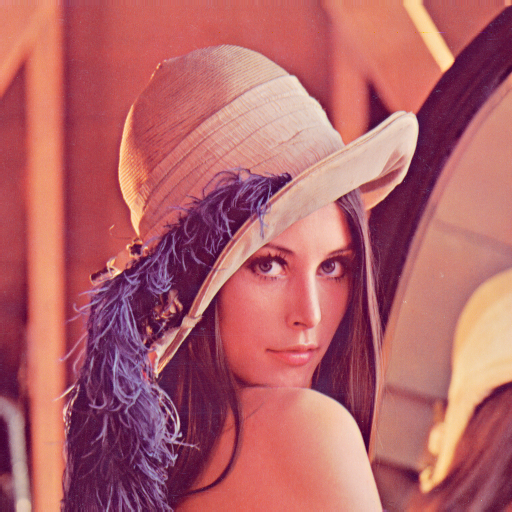

####Horizontal####


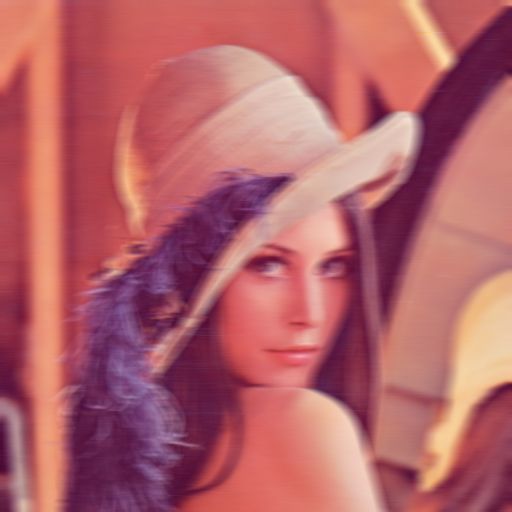

####Vertical####


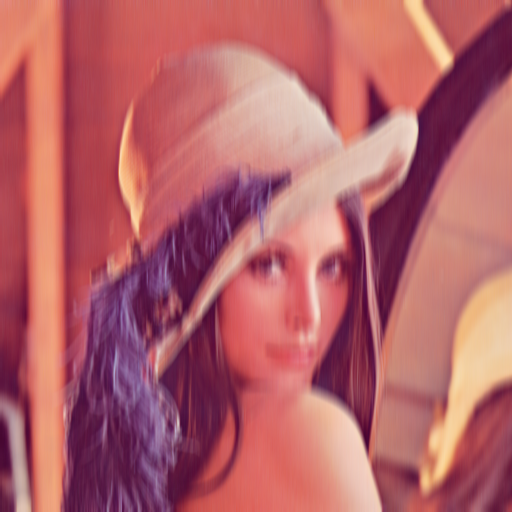

####Diagonal####


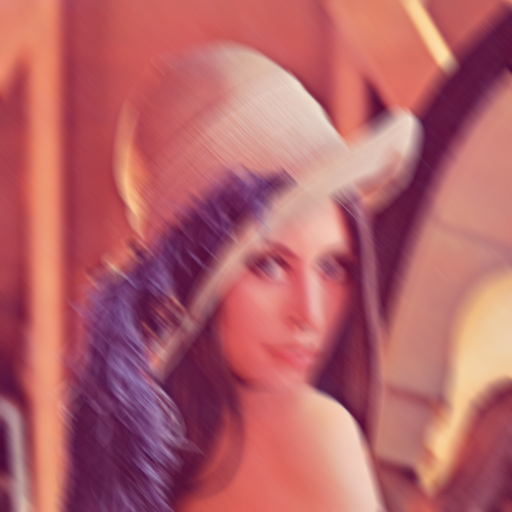

In [4]:
import numpy as np
import cv2  
from google.colab.patches import cv2_imshow


image = cv2.imread("Lenna.png")
# image = image/255
image = image.astype(np.float32)

k = 15
d = 1

kernelh = np.zeros((k, k), np.float32)
kernelh[int((k-1)/2), :] = 1/k
motionh = cv2.filter2D(image, -1, kernelh)

kernelv = np.zeros((k, k), np.float32)
kernelv[:,int((k-1)/2)] = 1/k
motionv = cv2.filter2D(image, -1, kernelv)

kerneld = np.zeros((k, k), np.float32)
# kernelc[int((k-1)/2),int((k-1)/2)] = 1/k
np.fill_diagonal(kerneld, 1/k)
motiond = cv2.filter2D(image, -1, kerneld)

# cv2_imshow(image*255)
# cv2_imshow(motionh*255)
# cv2_imshow(motionv*255)

print("####Original####")
cv2_imshow(image)
print("####Horizontal####")
cv2_imshow(motionh)
print("####Vertical####")
cv2_imshow(motionv)
print("####Diagonal####")
cv2_imshow(motiond)

